<a href="https://colab.research.google.com/github/Papa-Panda/Paper_reading/blob/main/EM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# generated by https://gemini.google.com/app/2894d86f36394d93

# not much algo is exposed here
# mainpurpose is to understand EM part in https://link.zhihu.com/?target=https%3A//spaces.ac.cn/archives/5716

Generating synthetic data with 4 clusters...


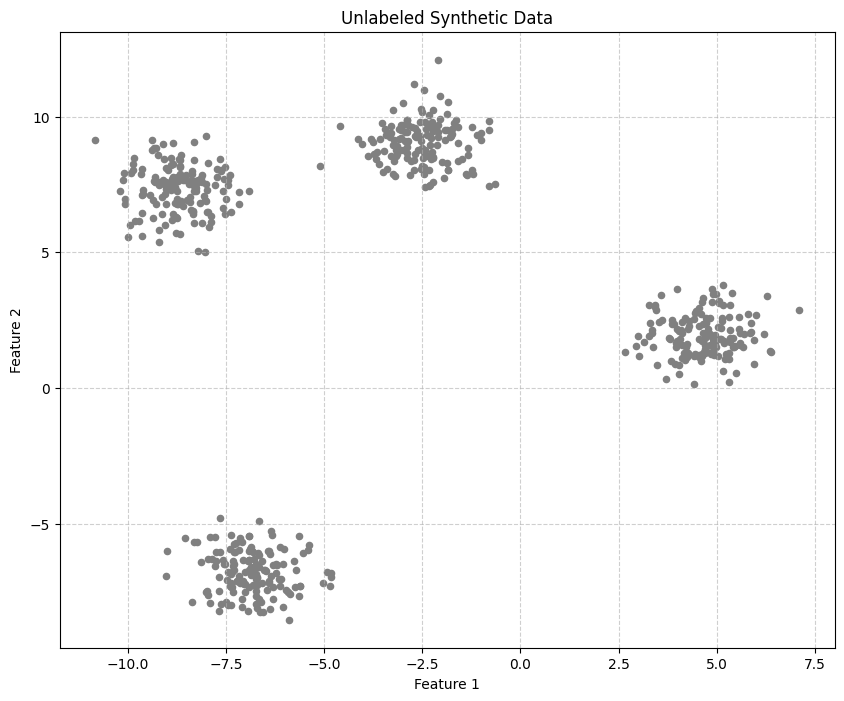

Applying the EM algorithm via GaussianMixture...
Visualizing the clustering results...


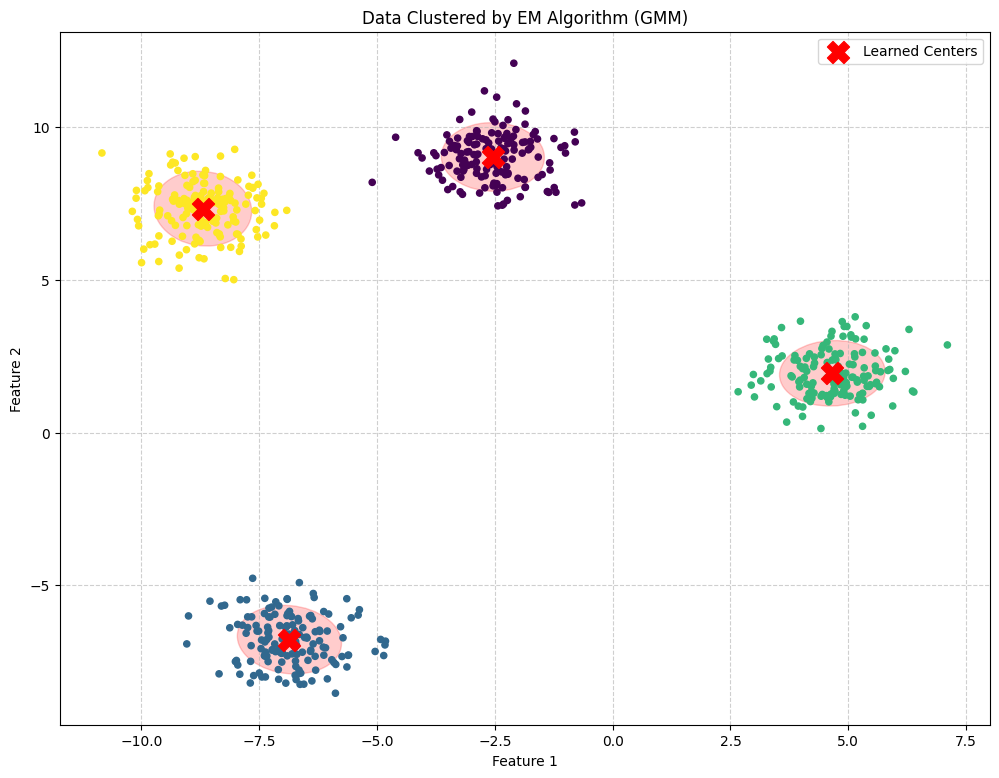


Sample of soft cluster assignments (probabilities):
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# --- 1. Generate Synthetic Data ---
# We create a dataset with 4 distinct clusters to simulate real-world data
# where groupings are present but not labeled.
print("Generating synthetic data with 4 clusters...")
X, y_true = make_blobs(n_samples=600, centers=4,
                       cluster_std=0.8, random_state=42)

# Plot the raw, unlabeled data to see what we're starting with
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], s=20, color='gray')
plt.title('Unlabeled Synthetic Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# --- 2. Apply the EM Algorithm using GaussianMixture ---
# We instantiate the GaussianMixture model. The key parameter is `n_components`,
# which is the number of clusters we are looking for.
# The .fit() method runs the Expectation-Maximization algorithm to find the
# parameters of the Gaussian distributions that best fit the data.
print("Applying the EM algorithm via GaussianMixture...")
gmm = GaussianMixture(n_components=4, random_state=42, covariance_type='full')
gmm.fit(X)

# Predict the cluster for each data point using the trained model
labels = gmm.predict(X)


# --- 3. Visualize the Results ---
# Now we plot the data again, but this time we color the points according to
# the cluster labels found by the EM algorithm.
print("Visualizing the clustering results...")
plt.figure(figsize=(12, 9))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='viridis', zorder=2)

# We can also get the cluster centers learned by the algorithm
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=250, marker='X', zorder=3, label='Learned Centers')

# To better visualize the "shape" of each cluster, we can draw ellipses
# representing the covariance of each Gaussian component.
for i in range(gmm.n_components):
    # Get the covariance matrix for the i-th component
    covariance = gmm.covariances_[i]

    # Calculate eigenvalues and eigenvectors. Eigenvectors are in columns of w.
    v, w = np.linalg.eigh(covariance)

    # Determine the angle of the ellipse from the first eigenvector.
    # The eigenvector is a column in w, so we access its components with w[1, 0] and w[0, 0].
    angle_rad = np.arctan2(w[1, 0], w[0, 0])
    angle_deg = np.degrees(angle_rad)  # Convert to degrees for matplotlib

    # The eigenvalues v are the variances. The width and height of the ellipse
    # are proportional to the standard deviation (sqrt of variance).
    # We use a scaling factor to make the ellipse visible.
    width, height = 2 * np.sqrt(2.) * np.sqrt(v)

    # Create and add the ellipse patch to the plot.
    # The 'angle' parameter MUST be passed as a keyword argument to fix the TypeError.
    ellipse = plt.matplotlib.patches.Ellipse(gmm.means_[i], width, height,
                                              angle=angle_deg,
                                              color='red', alpha=0.2, zorder=1)
    ax = plt.gca()
    ax.add_artist(ellipse)

plt.title('Data Clustered by EM Algorithm (GMM)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# You can also inspect the probabilities of each point belonging to each cluster
# This is the "soft" assignment from the E-step of the final iteration.
probabilities = gmm.predict_proba(X)
print("\nSample of soft cluster assignments (probabilities):")
print(probabilities[:5].round(3))

